In [1]:
import pandas as pd
import pickle
import numpy as np
import tensorflow as tf

In [2]:
# import final embedding models

transE_model = pickle.load(open('data/models/transE_model.p', 'rb'))
transR_model = pickle.load(open('data/models/transR_model.p', 'rb'))
convE_model = pickle.load(open('data/models/convE_model.p', 'rb'))
complEx_model = pickle.load(open('data/models/complEx_model.p', 'rb'))
custom_model = pickle.load(open('data/models/custom_model.p', 'rb'))

In [4]:
# get test set AMRIs for all types of relations
model_names = np.array(['TransE', 'TransR', 'ConvE', 'ComplEx', 'Hierarchical TransR'])

AMRIs = np.array([transE_model['amri'],
                  transR_model['amri'],
                  convE_model['amri'],
                  complEx_model['amri'],
                  custom_model['amri']])

AMRIs_pathway_relations = np.array([transE_model['amri_pathway_relations'],
                                    transR_model['amri_pathway_relations'],
                                    convE_model['amri_pathway_relations'],
                                    complEx_model['amri_pathway_relations'],
                                    custom_model['amri_pathway_relations']])

AMRIs_TF_relations = np.array([transE_model['amri_TF_relations'],
                               transR_model['amri_TF_relations'],
                               convE_model['amri_TF_relations'],
                               complEx_model['amri_TF_relations'],
                               custom_model['amri_TF_relations']])

AMRIs_GO_gene_term_relations = np.array([transE_model['amri_GO_gene_term_relations'],
                                         transR_model['amri_GO_gene_term_relations'],
                                         convE_model['amri_GO_gene_term_relations'],
                                         complEx_model['amri_GO_gene_term_relations'],
                                         custom_model['amri_GO_gene_term_relations']])

AMRIs_GO_term_term_relations = np.array([transE_model['amri_GO_term_term_relations'],
                                         transR_model['amri_GO_term_term_relations'],
                                         convE_model['amri_GO_term_term_relations'],
                                         complEx_model['amri_GO_term_term_relations'],
                                         custom_model['amri_GO_term_term_relations']])

AMRIs_physical_int_relations =  np.array([transE_model['amri_physical_int_relations'],
                                         transR_model['amri_physical_int_relations'],
                                         convE_model['amri_physical_int_relations'],
                                         complEx_model['amri_physical_int_relations'],
                                         custom_model['amri_physical_int_relations']])

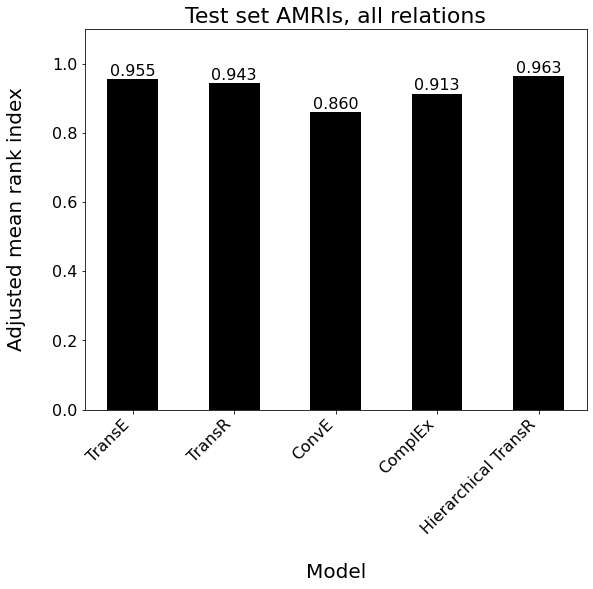

In [5]:
## plot AMRIs for all relations

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.rcParams['font.size'] = 16

def add_labs(ax, x_locs, y_locs, labs, fontsize = 11):
    
    for x_pos, y_pos, lab in zip(x_locs, y_locs, labs):
        
        ax.text(y = y_pos, 
                x = x_pos,
                s = lab, 
                horizontalalignment = 'center',
                fontsize = fontsize)
        
fig, ax = plt.subplots(figsize = (9, 7))

x = np.arange(len(model_names))
ax.bar(x = x, 
       height = AMRIs,
       width = 0.5,
       color = 'black')

add_labs(ax, 
         x_locs = x,
         y_locs = [amri + 0.01 for amri in AMRIs], 
         labs = [f'{amri:.3f}' for amri in AMRIs],
         fontsize = 16)

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation = 45, ha = 'right')
ax.set_xlabel('\nModel', fontsize = 20)
ax.set_ylabel('Adjusted mean rank index\n', fontsize = 20)
ax.set_title('Test set AMRIs, all relations', fontsize = 22)
ax.set_ylim(0, 1.1)

plt.savefig('../figures/fig3a.png', facecolor = 'white', bbox_inches = 'tight', dpi = 300)

In [6]:
## Get test set composition of relation types

# get counts for all relations in the test set for hierarchical transR model
custom_test = pd.read_csv('data/models/custom_test.tsv', sep = '\t')
custom_test_num_pathway_relations = sum(custom_test['general_relation_lab'] != custom_test['specific_relation_lab'])
custom_test_num_TF_relations = sum(custom_test['general_relation_lab'] == 'TF_BINDING')
custom_test_num_GO_gene_relations = sum(np.logical_xor(custom_test['head_type'] == 'GeneOntologyTerm', 
                                                       custom_test['tail_type'] == 'GeneOntologyTerm'))
custom_test_num_GO_term_relations = sum((custom_test['head_type'] == 'GeneOntologyTerm') & 
                                        (custom_test['head_type'] == 'GeneOntologyTerm'))
custom_test_num_physint_relations = sum(custom_test['general_relation_lab'] == 'PHYSICAL_INTERACTION')

# normalise counts
custom_relation_counts = np.array([custom_test_num_pathway_relations,
                                   custom_test_num_TF_relations, 
                                   custom_test_num_GO_gene_relations, 
                                   custom_test_num_GO_term_relations, 
                                   custom_test_num_physint_relations])
custom_relation_freqs = custom_relation_counts / custom_relation_counts.sum()


# same for pykeen model test set
pykeen_test = pd.read_csv('data/models/pykeen_test.tsv', sep = '\t')
pykeen_test_num_pathway_relations = sum(pykeen_test['general_relation_lab'] != pykeen_test['specific_relation_lab'])
pykeen_test_num_TF_relations = sum(pykeen_test['general_relation_lab'] == 'TF_BINDING')
pykeen_test_num_GO_gene_relations = sum(np.logical_xor(pykeen_test['head_type'] == 'GeneOntologyTerm', 
                                                       pykeen_test['tail_type'] == 'GeneOntologyTerm'))
pykeen_test_num_GO_term_relations = sum((pykeen_test['head_type'] == 'GeneOntologyTerm') & 
                                        (pykeen_test['head_type'] == 'GeneOntologyTerm'))
pykeen_test_num_physint_relations = sum(pykeen_test['general_relation_lab'] == 'PHYSICAL_INTERACTION')

pykeen_relation_counts = np.array([pykeen_test_num_pathway_relations,
                                   pykeen_test_num_TF_relations, 
                                   pykeen_test_num_GO_gene_relations, 
                                   pykeen_test_num_GO_term_relations, 
                                   pykeen_test_num_physint_relations])
pykeen_relation_freqs = pykeen_relation_counts / pykeen_relation_counts.sum()

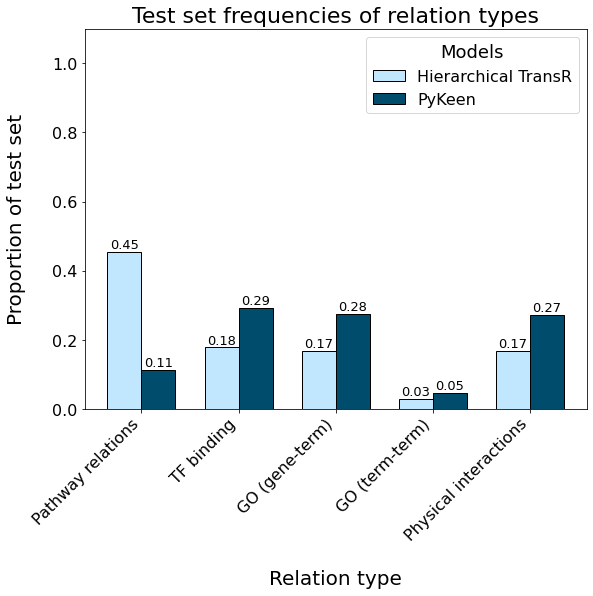

In [7]:
## Plot test set relation composition

plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize = (9, 7))

rel_types = ['Pathway relations', 'TF binding', 'GO (gene-term)', 'GO (term-term)', 'Physical interactions']

x = np.arange(len(model_names))
width = 0.35

ax.bar(x = x - width/2, height = custom_relation_freqs, width = width,
       label = 'Hierarchical TransR', color = '#c1e7ff', edgecolor = 'black')
ax.bar(x = x + width/2, height = pykeen_relation_freqs, width = width,
       label = 'PyKeen', facecolor = '#004c6d', edgecolor = 'black')

add_labs(ax, x_locs = x - width/2,
         y_locs = [freq + 0.01 for freq in custom_relation_freqs],
         labs = [f'{freq:.2f}' for freq in custom_relation_freqs],
         fontsize = 13)

add_labs(ax, x_locs = x + width/2,
         y_locs = [freq + 0.01 for freq in pykeen_relation_freqs],
         labs = [f'{freq:.2f}' for freq in pykeen_relation_freqs],
         fontsize = 13)

ax.legend(title = 'Models', 
          title_fontsize = 18)

ax.set_xticks(x)
ax.set_xticklabels(rel_types, rotation = 45, ha = 'right')
ax.set_xlabel('\nRelation type', fontsize = 20)
ax.set_ylabel('Proportion of test set\n', fontsize = 20)
ax.set_title('Test set frequencies of relation types', fontsize = 22)
ax.set_ylim(0, 1.1)

plt.savefig('../figures/fig3b.png', facecolor = 'white', bbox_inches = 'tight', dpi = 300)

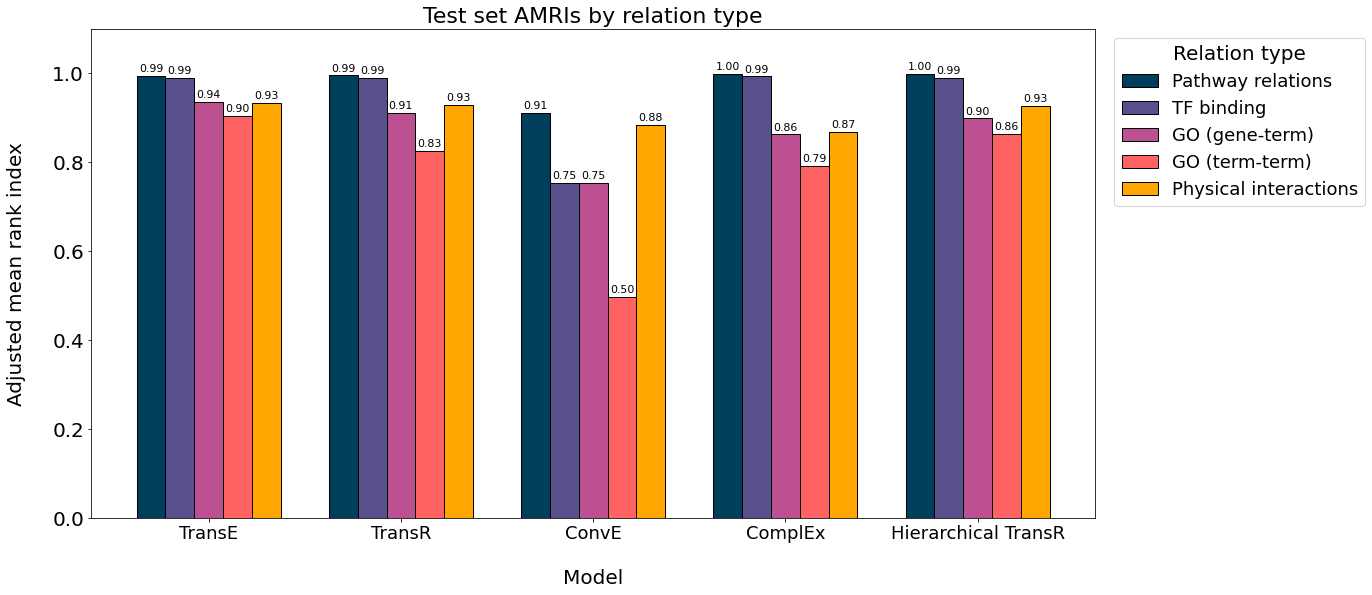

In [8]:
## Make plots of test set AMRIs across relation types 

plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize = (18, 9))

x = np.arange(len(model_names))
width = 0.15
rel_types = ['Pathway relations', 'TF binding', 'GO (gene-term)', 'GO (term-term)', 'Physical interactions']

colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

for i, amris in enumerate(zip(AMRIs_pathway_relations, AMRIs_TF_relations, 
                              AMRIs_GO_gene_term_relations, AMRIs_GO_term_term_relations,
                              AMRIs_physical_int_relations)):
    for amri, rel_type, col, offset in zip(amris, rel_types, colors, range(-2, 3)):
        ax.bar(x = x[i] + offset*width,
               height = amri,
               width = width,
               facecolor = col,
               edgecolor = 'black',
               label = rel_type)
    if i == 0:
        ax.legend(title = 'Relation type', 
                  bbox_to_anchor = [1.01, 1],
                  title_fontsize = 20, 
                  fontsize = 18)
        
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize = 18)
ax.set_xlabel('\nModel', fontsize = 20)
ax.set_ylabel('Adjusted mean rank index\n', fontsize = 20)
ax.set_title('Test set AMRIs by relation type', fontsize = 22)
ax.set_ylim(0, 1.1)
        
all_amris = []
for amris in zip(AMRIs_pathway_relations, AMRIs_TF_relations, 
                 AMRIs_GO_gene_term_relations, AMRIs_GO_term_term_relations,
                 AMRIs_physical_int_relations):
    all_amris.extend(list(amris))

x_locs = []
for x_loc in x:
    for offset in range(-2, 3):
        x_locs.append(x_loc + offset*width)
        
add_labs(ax, 
         x_locs = x_locs,
         y_locs = [amri + 0.01 for amri in all_amris], 
         labs = [f'{amri:.2f}' for amri in all_amris])
plt.savefig('../figures/fig3c.png', facecolor = 'white', bbox_inches = 'tight', dpi = 300)